## 합성곱 신경망 (Convolutional Neural Network, CNN)

합성곱 신경망(CNN)은 **이미지** 처리와 패턴 인식에 주로 사용되는 신경망 구조입니다. CNN은 입력 데이터에 필터(커널)를 적용하여 특징을 추출하고, 풀링 연산을 통해 중요한 정보를 유지하면서 공간 크기를 줄입니다. 이러한 과정을 반복하여 고수준의 특징을 추출하고 분류 및 인식 작업을 수행합니다. CNN은 이미지 분류, 객체 검출, 분할 등 다양한 컴퓨터 비전 태스크에 효과적으로 적용됩니다.

---

이번 실습에서는 CNN을 사용하여 CIFAR-10 데이터셋을 학습하고, 테스트 데이터에 대한 예측을 수행합니다. CNN 모델을 구축하고 훈련하는 과정을 진행한 후, 모델의 정확도를 평가합니다.

실습에서는 데이터 전처리, 모델 구축, 모델 컴파일, 훈련, 평가 등의 과정을 진행합니다. CNN을 사용하여 이미지 데이터의 특징을 추출하고 분류하는 과정을 경험해보세요.

---


__[텐서플로우 설치]__
- 텐서플로우가 설치되지 않았다면 아래 명령어를 실행하여 설치해 주세요.

In [2]:
#!pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org -U tensorflow
!pip install tensorflow

### 1. 필요한 라이브러리 임포트 하기

__사내 PC 실습 안내__ 
- 본 실습자료는 외부 인터넷 환경에서 자료를 다운로드하는 과정이 담겨 있습니다.
- 사내 PC에서 실습하실 경우 SSL 인증 오류가 발생할 수 있습니다.
- SSL 인증을 생략하여 오류를 방지하는 아래 코드를 실행한 후, 실습을 진행 해 주시면 됩니다.
- 따라서, 내용은 영상 속 강의자료와 다를 수 있습니다.

```python
import ssl
# https 인증 시, 기본 인증 컨텍스트를, 인증 생략 컨텍스트로 변경
ssl._create_default_https_context = ssl._create_unverified_context
```


In [3]:
import ssl
# https 인증 시, 기본 인증 컨텍스트를, 인증 생략 컨텍스트로 변경
ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

#### Information:
TensorFlow를 사용하여 CIFAR-10 데이터셋을 로드하고, CNN(Convolutional Neural Network) 모델을 구성하여 이미지 분류 작업을 수행합니다. 주요 라이브러리와 모듈들은 다음과 같이 사용됩니다:

- `numpy as np`: 수치 계산을 위한 다차원 배열 처리 라이브러리입니다.
- `tensorflow as tf`: 오픈 소스 기계 학습 프레임워크인 TensorFlow를 사용하기 위한 라이브러리입니다.
- `tensorflow.keras.datasets.cifar10`: CIFAR-10 데이터셋을 로드하기 위한 모듈입니다. CIFAR-10은 10개의 클래스로 이루어진 컬러 이미지 데이터셋입니다.
- `tensorflow.keras.models.Sequential`: 순차적인 모델을 생성하기 위한 클래스입니다. 모델은 레이어를 선형으로 쌓아 구성할 수 있습니다.
- `tensorflow.keras.layers.Conv2D`: 합성곱 레이어입니다. 이미지 데이터의 특징을 추출하는 데 사용됩니다.
- `tensorflow.keras.layers.MaxPooling2D`: 최대 풀링 레이어입니다. 이미지의 공간 해상도를 줄이는 데 사용됩니다.
- `tensorflow.keras.layers.Flatten`: 입력 데이터를 1차원으로 평탄화시키는 레이어입니다. 다차원 배열의 데이터를 1차원으로 변환하여 신경망의 입력으로 사용할 수 있습니다.
- `tensorflow.keras.layers.Dense`: 완전 연결 레이어입니다. 입력과 출력을 모두 연결하여 가중치를 학습합니다.
- `sklearn.preprocessing.MinMaxScaler`: 데이터를 정규화하기 위한 클래스입니다. 입력 데이터를 특정 범위로 스케일링하여 모델의 학습을 돕는 데 사용됩니다.
- `sklearn.model_selection.train_test_split`: 데이터셋을 훈련 및 테스트 세트로 나누기 위한 함수입니다.
- `matplotlib.pyplot as plt`: 데이터 시각화를 위한 라이브러리입니다.

### 2. 데이터셋 생성
#####  CIFAR-10 데이터셋 로드

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


### 3. 데이터 전처리

다음과 같은 데이터 전처리 과정을 수행합니다.

- `x_train = x_train / 255.0`: 훈련 데이터를 0과 1 사이의 범위로 정규화합니다. 정규화는 데이터의 범위를 일정하게 조정하여 모델의 학습을 돕는 역할을 합니다. CIFAR-10 데이터셋은 각 픽셀 값이 0에서 255 사이의 정수로 표현되는 이미지로 구성되어 있습니다. 따라서 이 값을 255로 나누면 모든 픽셀 값이 0에서 1 사이의 실수로 변환됩니다. 이는 모델이 데이터를 더 잘 처리하고 일반화할 수 있도록 돕는 역할을 합니다.
- `x_test = x_test / 255.0`: 테스트 데이터도 동일하게 0과 1 사이의 범위로 정규화합니다.

정규화를 수행하는 이유는 모델이 입력 데이터의 스케일 차이에 영향을 받지 않고 일관된 방식으로 학습할 수 있도록 하기 위함입니다. 또한, 정규화를 통해 모델의 수렴 속도를 향상시키고, 과적합을 방지하는 일반화 효과를 얻을 수 있습니다.


In [5]:
# 데이터 전처리
x_train = x_train / 255.0
x_test = x_test / 255.0

### 4. 모델(CNN) 구축

Sequential 모델을 사용하여 이미지 분류를 위한 CNN(Convolutional Neural Network) 모델을 구성하는 과정입니다.

- `model = Sequential()`: Sequential 모델을 생성합니다. Sequential 모델은 레이어를 선형으로 쌓아 구성할 수 있는 가장 간단한 형태의 모델입니다.

- `model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))`: 32개의 필터를 사용하여 3x3 크기의 컨볼루션(Convolution) 레이어를 추가합니다. 활성화 함수로는 ReLU(Rectified Linear Unit)를 사용합니다. 입력 이미지의 크기는 (32, 32, 3)입니다.

- `model.add(MaxPooling2D((2, 2)))`: 2x2 크기의 맥스 풀링(Max Pooling) 레이어를 추가합니다. 맥스 풀링은 입력 영역에서 가장 큰 값을 선택하여 다운샘플링하는 과정입니다. 이를 통해 공간적인 특징을 추출하고 계산량을 줄입니다.

- `model.add(Conv2D(64, (3, 3), activation='relu'))`: 64개의 필터를 사용하여 3x3 크기의 컨볼루션 레이어를 추가합니다. 활성화 함수로는 ReLU를 사용합니다.

- `model.add(MaxPooling2D((2, 2)))`: 2x2 크기의 맥스 풀링 레이어를 추가합니다.

- `model.add(Conv2D(64, (3, 3), activation='relu'))`: 64개의 필터를 사용하여 3x3 크기의 컨볼루션 레이어를 추가합니다. 활성화 함수로는 ReLU를 사용합니다.

- `model.add(Flatten())`: 다차원의 입력을 1차원으로 평탄화시키는 레이어를 추가합니다. 이는 컨볼루션 레이어의 출력을 전결합층(Fully Connected Layer)에 전달하기 위해 필요합니다.

- `model.add(Dense(64, activation='relu'))`: 64개의 뉴런으로 구성된 전결합층을 추가합니다. 활성화 함수로는 ReLU를 사용합니다.

- `model.add(Dense(10))`: 10개의 뉴런으로 구성된 출력층을 추가합니다. 이는 CIFAR-10 데이터셋의 10개의 클래스에 대한 확률 값을 출력하기 위한 것입니다.

위 모델은 컨볼루션 레이어와 맥스 풀링 레이어를 번갈아가며 쌓아 이미지의 특징을 추출하고, 이를 전결합층을 통해 분류하는 과정을 수행합니다. 활성화 함수로는 ReLU를 사용하여 비선형성을 도입하고, 출력층에서는 활성화 함수를 지정하지 않았습니다. 이는 다중 클래스 분류 문제에서는 일반적으로 softmax 활성화 함수가 사용되기 때문입니다.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

/opt/anaconda3/envs/aice/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 5. 모델 컴파일

모델 컴파일은 학습 프로세스를 설정하는 단계입니다.

- `model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])`: 모델 컴파일을 수행합니다. 여기서 사용된 인자들을 설명하면 다음과 같습니다:
    - `optimizer='adam'`: 최적화 알고리즘으로 Adam 옵티마이저를 사용합니다. Adam은 경사 하강법의 변종으로, 학습 속도를 자동으로 조절하여 빠르고 안정적인 학습을 도와줍니다.
    - `loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`: 손실 함수로 Sparse Categorical Crossentropy를 사용합니다. 이 함수는 다중 클래스 분류 문제에 적합하며, 실제 클래스 레이블이 정수 형태로 주어진 경우 사용됩니다. `from_logits=True`는 모델의 출력을 확률 값으로 해석하지 않고, 그대로 사용한다는 의미입니다.
    - `metrics=['accuracy']`: 모델의 평가 지표로 정확도(Accuracy)를 사용합니다. 이는 분류 문제에서 가장 일반적으로 사용되는 지표로, 모델의 예측 결과가 실제 레이블과 얼마나 일치하는지를 측정합니다.

위 코드는 모델을 컴파일하여 학습 프로세스를 설정하는 단계를 수행합니다.


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 6. 모델 훈련

- 모델을 학습시킵니다. 여기서 사용된 인자들을 설명하면 다음과 같습니다:
    - `x_train`과 `y_train`: 훈련 데이터셋의 입력과 레이블입니다.
    - `epochs=10`: 전체 훈련 데이터셋에 대해 반복 학습할 에포크(Epoch) 수를 지정합니다. 에포크는 훈련 데이터셋을 한 번 전체로 통과하는 것을 의미합니다.
    - `validation_data=(x_test, y_test)`: 검증 데이터셋의 입력과 레이블입니다. 모델 학습 중에 검증 데이터셋을 사용하여 모델의 성능을 평가합니다. 검증 데이터셋을 사용하여 모델이 과적합되지 않도록 제어할 수 있습니다.

위 코드는 주어진 훈련 데이터셋을 사용하여 모델을 학습시키는 단계를 수행합니다. 학습은 주어진 에포크 수만큼 반복되며, 각 에포크마다 훈련 데이터셋을 사용하여 모델의 가중치를 업데이트합니다. 또한, 검증 데이터셋을 사용하여 모델의 성능을 평가하고 모니터링합니다.


In [8]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3446 - loss: 1.7597 - val_accuracy: 0.5387 - val_loss: 1.2701
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5638 - loss: 1.2139 - val_accuracy: 0.6117 - val_loss: 1.1047
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6373 - loss: 1.0253 - val_accuracy: 0.6353 - val_loss: 1.0427
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6802 - loss: 0.9179 - val_accuracy: 0.6802 - val_loss: 0.9262
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7101 - loss: 0.8345 - val_accuracy: 0.6829 - val_loss: 0.9103
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7315 - loss: 0.7696 - val_accuracy: 0.7046 - val_loss: 0.8637
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7478 - loss: 0.7179 - val_accuracy: 0.6952 - val_loss: 0.8838
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7617 - lo

### 7. 모델 평가
##### 테스트 데이터(X_test, y_test)를 사용하여 모델의 손실과 정확도를 평가합니다.

`verbose`는 모델 학습 중에 출력되는 정보의 양을 조절하는 인자입니다.

- `verbose=2`: 학습 과정에서 에포크마다 한 줄씩 출력됩니다. 각 에포크마다 진행 상황과 손실 값(loss) 및 정확도(accuracy)가 표시됩니다.

verbose 값에 따라 출력되는 정보의 양이 다르며, 일반적으로 다음과 같이 설정할 수 있습니다:
- `verbose=0`: 출력이 없습니다.
- `verbose=1`: 진행 막대(progress bar)와 함께 간단한 정보를 출력합니다.
- `verbose=2`: 각 에포크마다 상세한 정보를 출력합니다.

`verbose` 인자는 모델 학습 중에 출력되는 정보의 양을 조절하여 사용자에게 적절한 학습 과정 모니터링을 제공합니다.

In [9]:
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.7145 - loss: 0.8557
Test Loss: 0.8557
Test Accuracy: 0.7145


### 8. 예측 수행
##### CIFAR-10 이미지를 사용하여 예측 수행

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


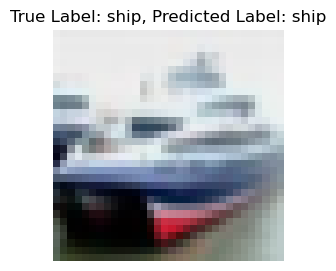

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 테스트 데이터셋에서 이미지 하나 선택
image_index = 1
test_image = x_test[image_index]
true_label = y_test[image_index][0]  # 정수 스칼라로 변환

# 이미지 정규화 해제
test_image = test_image * 255

# 이미지 예측
predictions = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(predictions[0])  # 정수 스칼라로 변환

# 클래스 레이블 매핑
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 이미지 시각화 및 예측 결과 출력
plt.figure(figsize=(3, 3))  # 그림의 크기 조정
plt.imshow(test_image.astype(int))
plt.axis('off')
plt.title(f"True Label: {class_names[true_label]}, Predicted Label: {class_names[predicted_label]}")
plt.show()


## 실습 완료: CNN(Convolutional Neural Network, CNN) Summary

1. CNN 모델을 사용하여 CIFAR-10 데이터셋을 학습하고 평가하는 실습을 완료했습니다. CNN은 이미지 처리와 패턴 인식에 효과적으로 사용되는 신경망 구조입니다.

2. 실습을 통해 CNN 모델의 구성과 파라미터 조정, 이미지 전처리의 중요성 등을 경험하였습니다. 학습된 모델은 테스트 데이터에 대해 정확도를 평가할 수 있었습니다.

3. CNN을 이용한 이미지 분류와 패턴 인식은 다양한 컴퓨터 비전 문제에 적용할 수 있으며, 더 많은 실습과 응용을 통해 CNN 모델의 성능을 개선하고 다양한 이미지 데이터에 적용해 보시기 바랍니다. 감사합니다!